<a href="https://colab.research.google.com/github/srinikha193/Marketing_Methodology/blob/main/marketingproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/Data set For Clustering analysis (1).csv")
df


,Nationality,age,Gender,Occupation,Income,Visitng Frequency,Cuisine preferences,South,North,Fusion,desserts,Beverages,Price,Ambience,Taste,different cusines,Online delivery option
0,1,24,2,3,2,2,1,1,0,0,5,2,10,9,10,8,9
1,1,24,2,3,3,1,3,0,0,1,5,2,10,2,10,1,8
2,1,25,1,3,3,2,1,1,0,0,5,2,10,5,10,5,8
3,1,26,1,3,1,1,1,1,0,0,5,2,10,8,10,8,5
4,1,24,2,3,3,2,1,1,0,0,5,2,10,10,10,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,23,4,3,1,2,1,1,0,0,5,5,9,7,10,7,7
60,1,24,2,1,4,1,1,1,0,0,1,1,10,5,10,5,10
61,1,23,1,3,4,1,1,1,0,0,5,5,10,10,10,9,7
62,1,25,1,3,4,1,1,1,0,0,2,2,7,9,10,6,9


In [ ]:
# We will standardize all numeric variables, i.e., 'Color', 'Size', 'Brand Name', 'Price', 'Design', 'Sustainability'
scale = StandardScaler()
#rfm_std = scale.fit_transform(mydata[['Color', 'Size', 'Brand Name', 'Price', 'Design', 'Sustainability']])
rfm_std = scale.fit_transform(df[['age','Income','Visitng Frequency']])
#df_std = pd.DataFrame(data = rfm_std, columns = ['Color', 'Size', 'Brand Name', 'Price', 'Design', 'Sustainability'])
df_std = pd.DataFrame(data = rfm_std, columns = ['Age','Income','Visitng Frequency'])
df_std.head()

,Age,Income,Visitng Frequency
0,0.000000,0.014435,1.737620
1,0.000000,0.938292,-0.486534
2,0.494242,0.938292,1.737620
3,0.988483,-0.909421,-0.486534
4,0.000000,0.938292,1.737620


<Axes: >

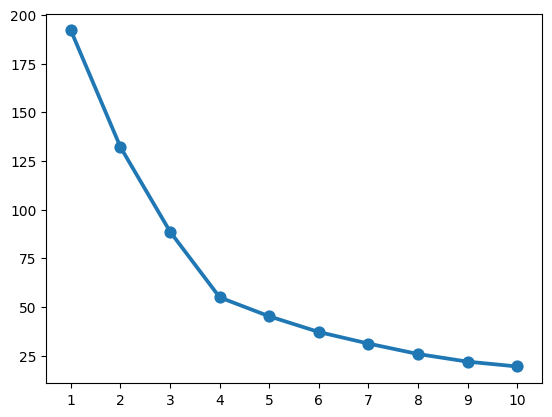

In [ ]:
elbow_sse = {}
for k in range(1, 11):
    km = KMeans(n_clusters=k,
                random_state=1)
    km.fit(df_std)
    elbow_sse[k] = km.inertia_

sns.pointplot(x=list(elbow_sse.keys()), y=list(elbow_sse.values()))

In [ ]:
n_clusters = 4  # Change this to your desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_std)  # Use 'data' instead of 'scaled_data' if not standardized
sse_for_each_point = kmeans.inertia_
print(f"SSE for each point in {n_clusters} clusters: {sse_for_each_point}")


SSE for each point in 4 clusters: 54.9267585118934


In [ ]:
n_clusters_range = range(2, 11)
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_std)
    sse_for_each_point = kmeans.inertia_
    print(f"SSE for {n_clusters} clusters: {sse_for_each_point}")


SSE for 2 clusters: 132.06979042244313
SSE for 3 clusters: 88.66389904550164
SSE for 4 clusters: 54.9267585118934
SSE for 5 clusters: 45.19233709783994
SSE for 6 clusters: 37.4960390589353
SSE for 7 clusters: 30.607317647728273
SSE for 8 clusters: 25.835845398626443
SSE for 9 clusters: 23.008388853468535
SSE for 10 clusters: 18.90273032617891


In [ ]:
X = rfm_std
# Set the number of clusters. In our case, I will run n from 2 to 9.
range_n_clusters = range(2, 10)

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.39873873907275315
For n_clusters = 3 The average silhouette_score is : 0.4124882758952411
For n_clusters = 4 The average silhouette_score is : 0.47312949549708616
For n_clusters = 5 The average silhouette_score is : 0.48409166532759507
For n_clusters = 6 The average silhouette_score is : 0.48199741685051933
For n_clusters = 7 The average silhouette_score is : 0.4860836714848048
For n_clusters = 8 The average silhouette_score is : 0.49225839174176556
For n_clusters = 9 The average silhouette_score is : 0.4757929058933412


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans = kmeans.fit(df)
labels = kmeans.predict(df) # Identifying Cluster labels

In [ ]:
df['label'] = labels # Adding the label to the original data set
df.head()

,Nationality,age,Gender,Occupation,Income,Visitng Frequency,Cuisine preferences,South,North,Fusion,desserts,Beverages,Price,Ambience,Taste,different cusines,Online delivery option,label
0,1,24,2,3,2,2,1,1,0,0,5,2,10,9,10,8,9,0
1,1,24,2,3,3,1,3,0,0,1,5,2,10,2,10,1,8,2
2,1,25,1,3,3,2,1,1,0,0,5,2,10,5,10,5,8,2
3,1,26,1,3,1,1,1,1,0,0,5,2,10,8,10,8,5,3
4,1,24,2,3,3,2,1,1,0,0,5,2,10,10,10,8,10,0


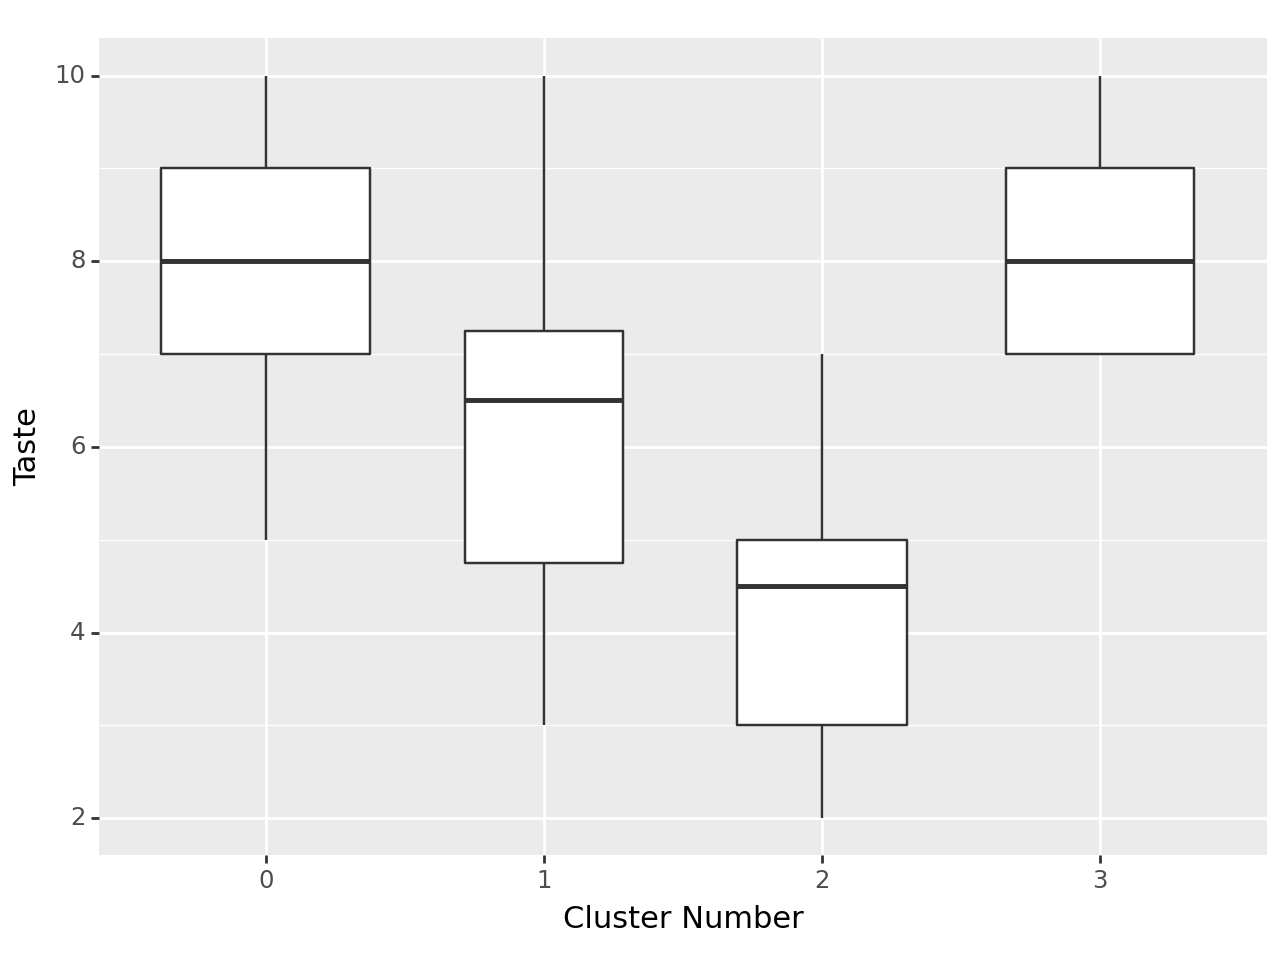

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(df)
    + geom_boxplot(aes(x='factor(label)', y='Ambience'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Taste")

)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Nationality             64 non-null     int64
 1   age                     64 non-null     int64
 2   Gender                  64 non-null     int64
 3   Occupation              64 non-null     int64
 4   Income                  64 non-null     int64
 5   Visitng Frequency       64 non-null     int64
 6   Cuisine preferences     64 non-null     int64
 7   South                   64 non-null     int64
 8   North                   64 non-null     int64
 9   Fusion                  64 non-null     int64
 10  desserts                64 non-null     int64
 11  Beverages               64 non-null     int64
 12  Price                   64 non-null     int64
 13  Ambience                64 non-null     int64
 14  Taste                   64 non-null     int64
 15  different cusines       6

In [ ]:
from sklearn.preprocessing import StandardScaler # version 1.0.2
from factor_analyzer import FactorAnalyzer

In [ ]:
 !pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 932.6 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=a879cdd935426f91ed476b83194d998c0aef439cb391b892898b57c6af88c1c8
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
import pandas as pd

# Create an empty DataFrame
df = pd.DataFrame()

# Add columns and values
df['restaurant'] = ['indian cuisine','kebab house', 'tikka express', 'mint']  # Adding values directly
df['Price'] = pd.Series([6.15,6.5,5.4,6.5])  # Adding values from a Series
df['ambience'] = pd.Series([5.8,5.8,5.9,3])
df['Taste'] =pd.Series([6.3,6.8,6.1, 9])
df['Frequency'] =pd.Series([5.2,5.3,4.5,7])
df


,restaurant,Price,ambience,Taste,Frequency
0,indian cuisine,6.15,5.8,6.3,5.2
1,kebab house,6.50,5.8,6.8,5.3
2,tikka express,5.40,5.9,6.1,4.5
3,mint,6.50,3.0,9.0,7.0


In [ ]:
scale = StandardScaler()
per_scaled = scale.fit_transform(df.iloc[:,1:])

In [ ]:
fa = FactorAnalyzer(rotation="varimax", n_factors=2, method='principal')
fa.fit(per_scaled)

FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [ ]:
loadings2 = pd.DataFrame(fa.loadings_, index=df.columns[1:], columns=[f"Factor{i+1}" for i in range(2)])
rotated_factor_pattern = loadings2[abs(loadings2) >= 0.4].dropna(how='all')
# display the results
rotated_factor_pattern

,Factor1,Factor2
Price,NaN,0.954604
ambience,-0.976902,NaN
Taste,0.924299,NaN
Frequency,0.865891,0.494906


In [ ]:
factors = fa.transform(per_scaled)
pca_scores = pd.DataFrame(factors, columns=["Factor1", "Factor2"], index=df.restaurant)
# Normalize the score by divideing each Score column with its maximum value
pca_scores_norm = pca_scores.apply(lambda x: x/max(abs(x)), axis=0)
pca_scores_norm

,Factor1,Factor2
restaurant,,
indian cuisine,-0.382114,0.150165
kebab house,-0.453936,0.657804
tikka express,-0.163950,-1.000000
mint,1.000000,0.192031


Text(0.5, 1.0, 'Perceptual Map')

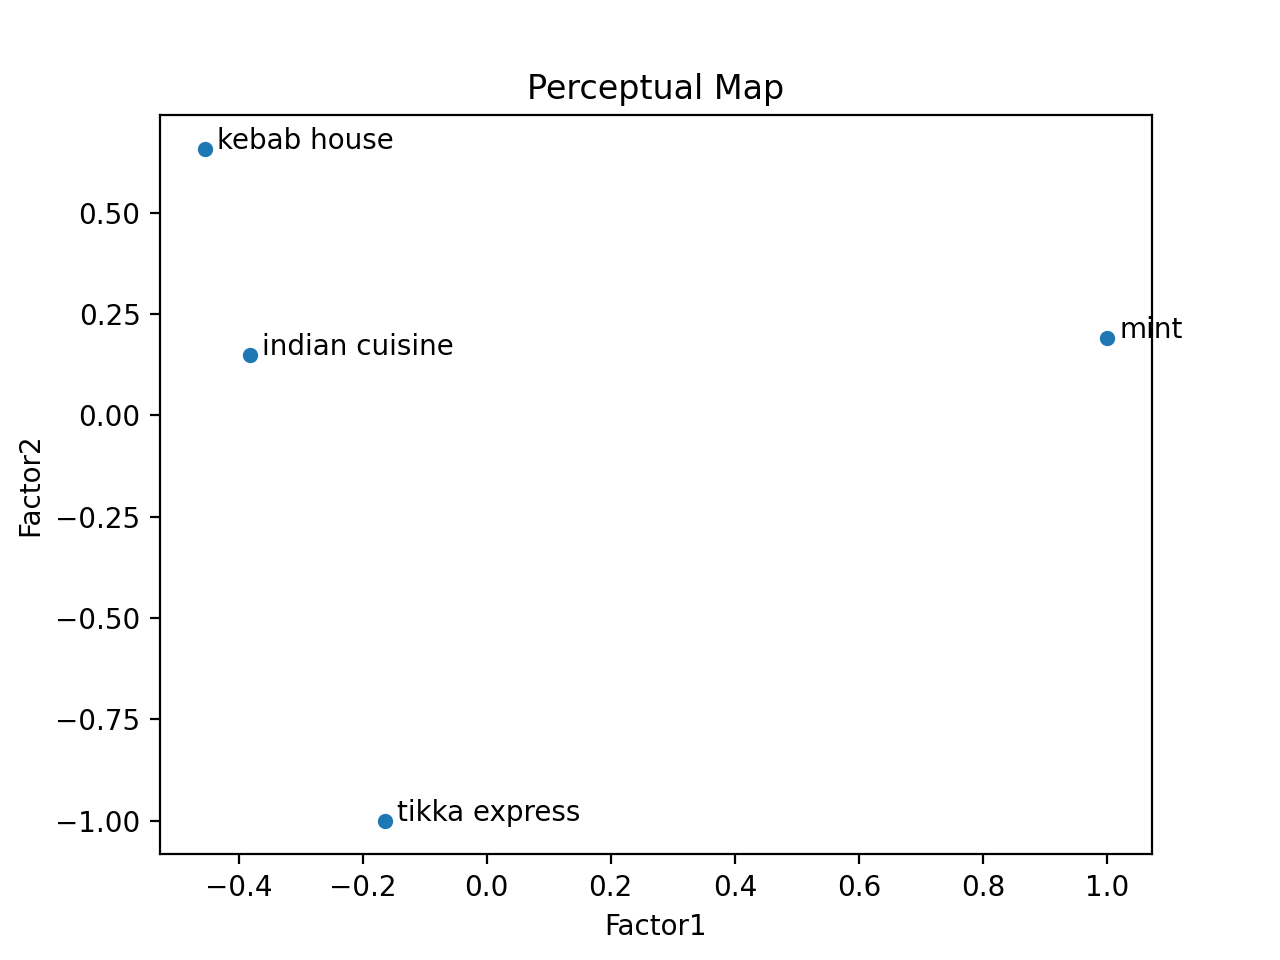

In [ ]:
def label_point(x, y, ax):
    a = pd.concat([x, y], axis=1).reset_index()
    for i, point in a.iterrows():
        ax.text(point['Factor1']+.02, point['Factor2'], str(point['restaurant']))

ax = sns.scatterplot(data=pca_scores_norm, x="Factor1", y="Factor2")
label_point(pca_scores_norm.Factor1, pca_scores_norm.Factor2, plt.gca())
plt.title('Perceptual Map')